pygame 2.5.2 (SDL 2.28.3, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
['diabetes', 'heart', 'rainfall']
1 diabetes
2 heart
3 rainfall
speak to read...
stop
You said:  number 3
['3']
rainfall
            Date  POONDI  CHOLAVARAM  REDHILLS  CHEMBARAMBAKKAM
0     01-01-2004     0.0         0.0       0.0              0.0
1     02-01-2004     0.0         0.0       0.0              0.0
2     03-01-2004     0.0         0.0       0.0              0.0
3     04-01-2004     0.0         0.0       0.0              0.0
4     05-01-2004     0.0         0.0       0.0              0.0
...          ...     ...         ...       ...              ...
6177  29-11-2020     0.0         0.0       0.0              0.0
6178  30-11-2020     4.0        13.0       6.0              0.0
6179  01-12-2020     0.0         0.0       0.0              0.0
6180  02-12-2020     0.0         0.0       0.0              0.0
6181  03-12-2020    44.0        24.0      23.0             26.

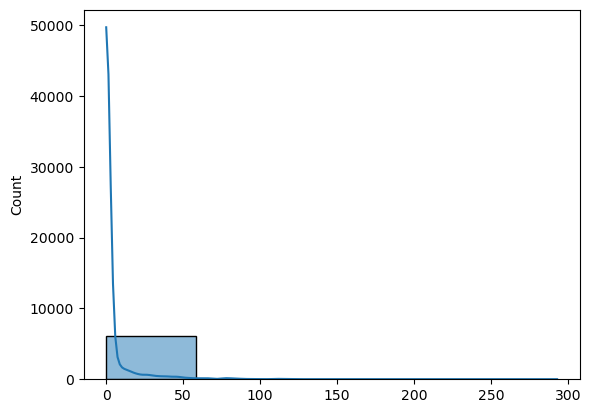

In [1]:
import speech_recognition as sr
from gtts import gTTS as gs
from io import BytesIO
from pygame import mixer
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vc=sr.Recognizer()
audio=''
def speak(txt,ln,td):
    mp3_fp = BytesIO()
    tts = gs(text = txt,lang=ln,tld=td)   #tld=top level domain
    tts.write_to_fp(mp3_fp)
    return mp3_fp
def playback(txt,lan,td):
    mixer.init()
    sound = speak(txt,lan,td)
    sound.seek(0)
    mixer.music.load(sound,'mp3')
    mixer.music.play()
import gtts
import time
def sentence_reader(cat):
    with sr.Microphone() as source:
        print('speak to read...')
        audio=vc.listen(source,phrase_time_limit=5)
    print('stop')
    try:
        text = vc.recognize_google(audio,language = 'en')
        print ("You said: ", text)
        t = f"You said,{cat,text}"
        playback(t,'en','co.in')
        time.sleep(3)
        return t
    except:
        print('could not understand your audio...please try again')
def sentence_reader_file_col():
    vc = sr.Recognizer()
    audio = ''
    with sr.Microphone() as source:
        print('speak to read...')
        audio=vc.listen(source,phrase_time_limit=10)
    print('stop')
    try:
        text = vc.recognize_google(audio,language = 'en')
        print ("You said: ", text)
        t = f"You said, {text} to continue."
        playback(t,'en','co.in')
        time.sleep(5)
        if 'yes' not in text.lower() and 'no' not in text.lower():
            t='you have given an invalid input, hence the program is terminated.'
            playback(t,'en','co.in')
            t='no'
        return 'yes' if 'yes' in text else 'no'
    except:
        k='you have not say anything.Hence program is terminated'
        playback(k,'en','co.in')
def get_file_data(fl):
    df=pd.read_csv(r"D:\Besant\Data science\mini project1\%s.csv"%(fl))
    return df
def say_row_count(count_row,count_columns):
    txt=f"The chosen file has {count_row} number of rows and {count_columns} number of columns"
    playback(txt,'en','co.in')
def get_query_val():
    txt="Do you want me to say the column names?. say yes or no"
    playback(txt,'en','co.in')
    time.sleep(5)
    read_check=sentence_reader_file_col()
    return read_check    
def say_col_name(cols):
    col_no=1
    time.sleep(4)
    for c in cols:
        text=f'column number{col_no}.{c}'
        playback(text,'en','co.in')
        time.sleep(5)
        col_no+=1
def get_file(lst):
    txt=f"I have {len(lst)} files."
    fl_no=1;scnd=4;
    for f in lst:
        txt+=f" file number {fl_no}, {f} file."
        fl_no+=1
        scnd+=4.5
    playback(txt,'en','co.in')
    time.sleep(scnd)
    txt='To select particular file, please say the file number'
    playback(txt,'en','co.in')
    time.sleep(5)
    fl_n=sentence_reader('file')
    fn=re.findall('\d',fl_n)
    print(fn)
    print (lst[int(fn[0])-1])
    file_df=get_file_data(lst[int(fn[0])-1])
    print(file_df)
    say_row_count(len(file_df),len(file_df.columns))
    time.sleep(7)
    if get_query_val()=='yes':
        say_col_name(list(file_df.columns))
        txt='To display the distribution plot, please say any column number'
        playback(txt,'en','co.in')
        time.sleep(5)
        fl_n=sentence_reader('column')
        fn=re.findall('\d',fl_n)
        col_lst=list(file_df.columns)
        txt=f'distribution plot for the selected column {col_lst[int(fn[0])-1]} obtained as following.'
        playback(txt,'en','co.in')
        print(col_lst[int(fn[0])-1])
        sns.histplot(file_df[col_lst[int(fn[0])]].tolist(),bins=5,kde=True)
        plt.show()
if __name__=="__main__":
    fl_l=os.listdir(r"D:\Besant\Data science\mini project1")
    lst=[x.split(".csv")[0] for x in fl_l]
    print(lst)
    no=1
    for f in lst:
        print(no, f)
        no+=1
    get_file(lst)
   